# Fundamentals16. 다양한 데이터 전처리 기법
## 16-1. 들어가며

**데이터 준비**

In [1]:
'''
$ mkdir -p ~/aiffel/data_preprocess/data
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/trade.csv
$ mv trade.csv ~/aiffel/data_preprocess/data
'''


'\n$ mkdir -p ~/aiffel/data_preprocess/data\n$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/trade.csv\n$ mv trade.csv ~/aiffel/data_preprocess/data\n'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("👽 Hello.")

👽 Hello.


- trade.csv 는 관세청 수출입 무역 통계 에서 가공한 데이터 입니다.   
<br/>      
- 특정 국가에 대한 월별 수출입 건수와 금액(단위:천 불(USD 1,000))
- **무역수지** = 수출금액-수입금액

In [3]:
import os

csv_file_path = os.getenv('HOME')+'/aiffel/data_preprocess/data/trade.csv'
trade = pd.read_csv(csv_file_path) 
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


---

## 16-2. 결측치(Missing Data)
- 다루는 데이터 중 결측치 포함한 경우가 많음
- 데이터 수집 과정 중 누락되지 않도록 하는 것이 더 좋은 방법
- 결측치 존재 시, 처리   


**결측치 처리 방법 두 가지**
1. 결측치가 있는 데이터 제거
2. 결측치값 대체 
    - 결측치 대체 방법은 다양하며 데이터 특성을 고려하여 해결

**결측치 여부 살펴보기**

In [4]:
print('전체 데이터 건수:', len(trade))

전체 데이터 건수: 199


**데이터 결측치 확인**    
**= 전체 데이터 건수 - 각 컬럼별 값이 있는 데이터 수**


In [5]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

- **기타사항**은 모두 결측치임으로 아무런 정보가 없으니 삭제

In [6]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


**결측치 행 살펴보기**
- **DataFrame.isnull()**은 데이터마다 결측치 여부를 True, False로 반환합니다.   
-> 결측치 있으면 'True'   
<br/>   
- **DataFrame.any(axis=1)**는 행마다 하나라도 True가 있으면 True, 그렇지 않으면 False를 반환합니다.   
-> 결측치 있으면 'True'

In [7]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [8]:
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

- **trade.isnull().any(axis=1)**을 다시 DataFrame에 넣어주면 값이 True인 데이터만 추출

In [9]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


- **index 191** 데이터는 수출금액과 무역수지 결측치 X   
-> **삭제하기보다 특정 값으로 대체**
- **index 196, 197, 198**은 모두 결측치(국가, 기간 제외)   
-> **제거하는 것이 바람직함**

<br/>   

- DataFrame의 **dropna**는 결측치를 삭제해주는 메서드입니다.
    - **subset** 옵션으로 특정 컬럼들을 선택했습니다.
    - **how** 옵션으로 선택한 컬럼 전부가 결측치인 행을 삭제하겠다는 의미로 'all'을 선택합니다. ('any': 하나라도 결측치인 경우)
    - **inplace** 옵션으로 해당 DataFrame 내부에 바로 적용시켰습니다.

In [10]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)
                                

In [11]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


**index 191과 같이 수치형 데이터 보완 방법**
    1. 특정 값을 지정해줄 수 있습니다. 그러나 결측치가 많은 경우, 모두 같은 값으로 대체한다면 데이터의 분산이 실제보다 작아지는 문제가 생길 수 있습니다.

    2. 평균, 중앙값 등으로 대체할 수 있습니다. 1번에서 특정 값으로 대체했을 때와 마찬가지로 결측치가 많은 경우 데이터의 분산이 실제보다 작아지는 문제가 발생할 수 있습니다.

    3. 다른 데이터를 이용해 예측값으로 대체할 수 있습니다. 예를 들어 머신러닝 모델로 2020년 4월 미국의 예측값을 만들고, 이 값으로 결측치를 보완할 수 있습니다.

    3. 시계열 특성을 가진 데이터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있습니다. 예를 들어 기온을 측정하는 센서 데이터에서 결측치가 발생할 경우, 전후 데이터의 평균으로 보완할 수 있습니다.

**=> index 191은 4번 방법을 통해 보완**

**DataFrame.loc[행 라벨, 열 라벨]을 입력하면 해당 라벨을 가진 데이터를 출력**

In [12]:
trade.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


**index 191의 수출금액 컬럼값을 이전 달과 다음 달의 평균으로 채움**

In [13]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액']) / 2

trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


**index 1919의 무역수지(수출금액 - 수입금액) 채우기**

In [14]:
trade.loc [191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액']
trade.loc[[191]]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


**범주형 데이터인 경우도 수치형 데이터와 유사**
1. 특정 값을 지정해줄 수 있습니다. 예를 들어 ‘기타’, ‘결측’과 같이 새로운 범주를 만들어 결측치를 채울 수 있습니다.

2. 최빈값 등으로 대체한다. 결측치가 많은 경우 최빈값이 지나치게 많아질 수 있으므로 결측치가 많을 때는 다른 방법을 사용한다.

3. 다른 데이터를 이용해 예측값으로 대체할 수 있다.

4. 시계열 특성을 가진 데로터의 경우 앞뒤 데이터를 통해 결측치를 대체할 수 있습니다. 예를 들어 특정인의 2019년 직업이 결측치이고, 2018년과 2020년 직업이 일치한다면 그 값으로 보완할 수 있습니다. 만약 다르다면 둘 중 하나로 보완하도록 합니다.

---

## 16-3. 중복된 데이터
- 데이터 수집 과정 중 중복 데이터 생길 수 있음
- 같은 값을 가진 데이터없이 행(row)별로 값이 유일해야 한다면 중복 데이터 제거

**중복된 데이터 확인**
- **DataFrame.duplicated()**는 중복된 데이터 여부를 불리언 값으로 반환

In [15]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [16]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [17]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


- **index 186, 187 중복**
- **DataFrame.drop_duplicates**를 통해 중복된 데이터를 손쉽게 삭제

In [18]:
trade.drop_duplicates(inplace=True)

In [19]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


**DataFrame.drop_duplicates를 좀 더 자세히 살펴보기**    
**Ex.** id와 name을 컬럼으로 갖는 df

In [20]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


- id가 002인 데이터가 2개 있습니다. 
- id가 사람마다 unique 하다고 할 때, 둘 중 하나는 삭제 해야 합니다.
- index가 클수록 나중에 들어온 데이터이고, 사용자가 이름을 수정했을 때 업데이트가 되지 않고 삽입이 되어 생긴 문제라고 가정합니다.
- 즉, id가 중복된 경우 맨 나중에 들어온 값만 남겨야 합니다.   
<br/>   
**DataFrame.drop_duplicates**의 **subset, keep** 옵션을 통해 손쉽게 중복을 제거할 수 있습니다.

In [21]:
df.drop_duplicates(subset=['id'], keep='last')

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


----

## 16-4. 이상치(Outlier)
- **이상치**: 대부분 값의 범위에서 벗어나 극단적으로 크거나 작은 값을 의미   
   
**이상치 찾는 방법**
- **z score**: 평균과 표준편차 이용하여 이상치 찾기
- = (X - 평균)/표준편차
- **z score**가 특정 기준을 넘어서는 데이터에 대해 이상치라고 판단
- 이상치의 기준에 따라 이상치 데이터가 많아지고 적어짐    
    
**이상치 판단 후**   
1. 가장 간단한 방법으로 이상치를 삭제할 수 있습니다. 이상치를 원래 데이터에서 삭제하고, 이상치끼리 따로 분석하는 방안도 있습니다.

2. 이상치를 다른 값으로 대체할 수 있습니다. 데이터가 적으면 이상치를 삭제하기보다 다른 값으로 대체하는 것이 나을 수 있습니다. 예를 들어 최댓값, 최솟값을 설정해 데이터의 범위를 제한할 수 있습니다.

3. 혹은 결측치와 마찬가지로 다른 데이터를 활용하여 예측 모델을 만들어 예측값을 활용할 수도 있습니다.

4. 아니면 binning을 통해 수치형 데이터를 범주형으로 바꿀 수도 있습니다.

### z-score method
- 이상치인 데이터의 인덱스를 리턴하는 **outlier**함수
- 데이터프레임: **df**
- 칼럼: **col**
- 기준: **z**   
<br/>   
- **abs(df[col] - np.mean(df[col]))** : 데이터에서 평균을 빼준 것에 절대값을 취합니다.
- **abs(df[col] - np.mean(df[col]))/np.std(df[col])** : 위에 한 작업에 표준편차로 나눠줍니다.
- **df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index**: 값이 z다 큰 데이터의 인덱스를 추출합니다.

In [22]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index



In [23]:
trade.loc[outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [24]:
trade.loc[outlier(trade, '무역수지',2)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
129,2018년 08월,중국,199010.0,14401521.0,280033.0,8525532.0,5875989.0
132,2018년 09월,중국,171328.0,14590529.0,280337.0,7889890.0,6700639.0


In [25]:
trade.loc[outlier(trade, '무역수지',3)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


- 무역수지의 이상치 기준이 높을수록 이상치는 적어짐

**not_outlier**라는 함수를 통해 무역수지가 이상치 값이 아닌 데이터만 추출

In [26]:
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col]) <= z].index


In [27]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


### IQR method
- **z-score** 방법의 대안으로 **사분위범위수 IQR(Interquartile range)**

**Ex. outlier를 포함한 임의의 데이터 만들기**

In [28]:
np.random.seed(2020)

# 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.random.randn(100)

# [8, 10, -3, -5])를 데이터 뒤에 추가함
data = np.concatenate((data, np.array([8, 10, -3, -5])))

data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

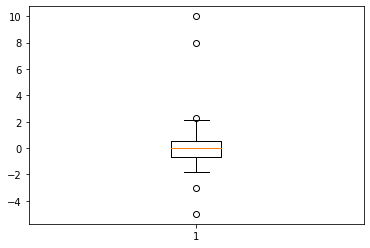

In [29]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

**사분위범위수 IQR(Interquartile range)을 이용하여 이상치 찾기 가능**
- **IQR = Q3 − Q1**
- **IQR**은 제 3사분위수에서 제 1사분위 값을 뺀 값으로 **데이터의 중간 50%의 범위**
- **Q1 − 1.5 ∗ IQR**보다 왼쪽에 있거나
- **Q3 + 1.5 ∗ IQR**보다 오른쪽에 있는 경우 **이상치**

**IQR을 구하기 위해 1, 3사분위수 구하기**

In [30]:
Q3, Q1 = np.percentile(data, [75,25])
IQR = Q3 - Q1
IQR

1.1644925829790964

**IQR과 1, 3사분위수를 이용하여 이상치 확인**

In [31]:
data[(Q1-1.5*IQR>data)|(Q3+1.5*IQR<data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

**[참고자료]**   
http://colingorrie.github.io/outlier-detection.html   
<br/>   
**Q. z-score 방법이 가지는 뚜렷한 단점 2가지가 무엇인가요?**   
**A.**   
1) Robust 하지 못함: 평균, 표준편차 자체가 이상치에 크게 영향 받기 때문    
2) 작은 데이터셋의 경우 z-score의 방법으로 이상치를 알아내기 어려움   
-> 특히, item이 12개 이하인 데이터셋에서 불가능

**무역수치 기준으로 이상치 찾는 실습**

In [32]:
def outlier2(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1 - 1.5*iqr)|(df[col] > q3 + 1.5*iqr)].index

outlier2(trade, '무역수지')

Int64Index([], dtype='int64')

----

## 16-5. 정규화(Normalization)
- trade data를 보면 수입건수, 수출건수, 수입금액, 수출금액, 수역수지 모두 단위가 다름
- 컬럼마다 스케일이 크게 차이나는 데이터를 입력하면 머신러닝 학습 시 문제 발생   
   
**Ex1.**     
    - A 컬럼: 0 ~ 1 
    - B 컬럼: 1000 ~ 10000
    - 클러스터링 할 경우, 데이터 간의 거리 잴 때 범위가 큰 B 컬럼의 값에만 영향을 받음   
    
**Ex2.**
    - Linear Regrssion  
    - 모델의 파라미터를 업데이트 하는 과정
    - 범위가 큰 컬럼 B의 파라미터만 집중적으로 업데이트 하는 문제 발생   
<br/>   
- 일반적으로 컬럼간 범위가 크게 다를 경우 전처리 과정에서 **데이터 정규화**
- 가장 잘 알려진 **표준화(Standardization)와 Min-Max-Scaling** 사용 예정

**Standardization** 
- 데이터의 평균:0, 분산:1 변환
- **(X - 평균) / 표준편차**
    
    
**Min-Max Scaling** 
- 데이터의 최솟값:0, 최댓값:1 변환
- **(X - X의 최솟값) / (X의 최댓값 - X의 최솟값)**

**Ex. 임의의 데이터로 연습**
- 데이터 생성 후 각각의 기법으로 데이터 정규화

**정규분포를 따라 랜덤하게 데이터 x를 생성**

In [33]:
np.random.seed(2020)
x = pd.DataFrame({'A': np.random.randn(100)*4 + 4,
                  'B': np.random.randn(100)-1})
x

,A,B
0,-3.075383,-0.448552
1,4.302209,-2.151012
2,-0.522519,-1.245304
3,1.394279,-1.169169
4,0.427537,-0.458080
...,...,...
95,13.250265,-0.734271
96,0.137697,-2.041710
97,2.614901,-3.057545
98,7.866735,-2.140529


**데이터 x를 Standardization 기법으로 정규화**

In [34]:

x_standardization = (x - x.mean())/x.std()
x_standardization

,A,B
0,-1.862058,0.559307
1,0.072383,-1.132240
2,-1.192684,-0.232338
3,-0.690090,-0.156691
4,-0.943575,0.549839
...,...,...
95,2.418607,0.275419
96,-1.019573,-1.023639
97,-0.370038,-2.032961
98,1.007019,-1.121824


**데이터 x를 min-max scaling 기법으로 정규화**

In [35]:

x_min_max = (x - x.min())/(x.max()-x.min())
x_min_max

,A,B
0,0.012283,0.607216
1,0.458634,0.267692
2,0.166733,0.448318
3,0.282702,0.463502
4,0.224213,0.605316
...,...,...
95,1.000000,0.550235
96,0.206677,0.289490
97,0.356550,0.086901
98,0.674291,0.269782


**이미지 데이터를 Standardization 기법으로 정규화 했을 때 분포**
- 각 컬럼의 평균: 0, 분산:1 변환

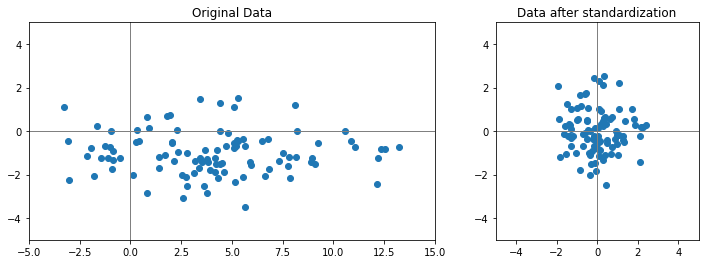

In [36]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_standardization['A'], x_standardization['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after standardization')

plt.show()

**이지지 데이터를 min-max scaling 기법으로 정규화 했을 때 분포**
- 각 칼럼의 최소값:0, 최대값:1 변환

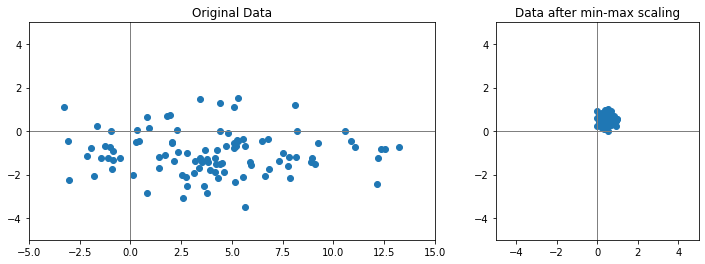

In [37]:
fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

axs[0].scatter(x['A'], x['B'])
axs[0].set_xlim(-5, 15)
axs[0].set_ylim(-5, 5)
axs[0].axvline(c='grey', lw=1)
axs[0].axhline(c='grey', lw=1)
axs[0].set_title('Original Data')

axs[1].scatter(x_min_max['A'], x_min_max['B'])
axs[1].set_xlim(-5, 5)
axs[1].set_ylim(-5, 5)
axs[1].axvline(c='grey', lw=1)
axs[1].axhline(c='grey', lw=1)
axs[1].set_title('Data after min-max scaling')

plt.show()

**trade data**   
- **Standardization**
- 정규화 시켜야 할 수치형 컬럼: **col변수**
- **(데이터 - 평균) / 표준편차**

**trade 데이터를 Standardization 기법으로 정규화**

In [38]:
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_Standardization = (trade[cols] - trade[cols].mean()) / trade[cols].std()
trade_Standardization.head()


,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.256342
1,-0.689278,-0.252848,0.412529,-0.964444,0.401088
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.097779
3,-0.417598,0.852853,-0.576399,0.705292,0.832209
4,-0.764918,-0.389673,0.146306,-1.276341,0.438027


In [39]:
trade_Standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.019128e-16,5.921189e-17,6.091993e-17,-8.312439e-17,3.074464e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.603764e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.116765e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.426824e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.461637e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.434109e+00


**Min-Max-Scaling**
- **(데이터 - 최솟값) / (최댓값 - 최솟값)**

**trade 데이터를 Min-Max-Scaling 기법으로 정규화**

In [40]:
trade[cols] = (trade[cols] - trade[cols].min()) / (trade[cols].max() - trade[cols].min())
trade[cols].head()



,수출건수,수출금액,수입건수,수입금액,무역수지
0,0.142372,0.794728,0.197014,0.700903,0.708320
1,0.035939,0.295728,0.332972,0.085394,0.496512
2,0.011187,0.042477,0.001249,0.112938,0.125310
3,0.078351,0.629759,0.099597,0.542551,0.603281
4,0.024131,0.254394,0.270146,0.000000,0.505660


In [41]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397180
std,0.156108,0.302099,0.235988,0.273790,0.247655
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


**주의!**
- train data & test data가 나눠져 있는 경우
- **train data 정규화 시켰던 기준 그대로 test data도 정규화**

In [42]:
train = pd.DataFrame([[10, -10], [30, 10], [50, 0]])
test = pd.DataFrame([[0, 1], [10, 10]])

**(코드 자세히 보기)**

In [43]:
train_min = train.min()
train_max = train.max()

train_min_max = (train - train_min) / (train_max - train_min)

# test를 min-max scaling할 때도 train 정규화 기준으로 수행
test_min_max = (test - train_min) / (train_max - train_min)

In [44]:
test_min_max

,0,1
0,-0.25,0.55
1,0.00,1.00


**scikit-learn**의 **standardscaler, minmaxscaler**를 사용하는 방법도 있습니다.

In [45]:
from sklearn.preprocessing import MinMaxScaler

train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()

In [46]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [47]:
scaler.transform(test)

array([[-0.25,  0.55]])

**[참고링크]**   
https://www.youtube.com/watch?v=FDCfw-YqWTE&feature=youtu.be

**+ 로그 변환 등의 기법도 정규화와 함께 사용하면 되움이 될 수 있음!**

-----

## 16-6. 원-핫 인코딩(One-Hot Encoding)
- 범주형 데이터 **'국가명'** 컬럼
- 머신러닝, 딥러닝 프레임워크에서 범주형을 지원하지 않는 경우 **원-핫 인코딩** 이용
<br/>   
**원-핫 인코딩**: 카테고리별 이진 특성을 만들어 해당하는 특성만 1 나머지는 0으로 만드는 방법

pandas에서 **get_dummies**함수를 통해 **원-핫 인코딩** 가능

In [48]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


**pd.concat**함수로 데이터프레임 trade & country 합침

In [49]:
trade = pd.concat([trade, country],axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,미국,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,일본,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,중국,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,미국,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


In [50]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,0.142372,0.794728,0.197014,0.700903,0.708320,0,0,1
1,2015년 01월,0.035939,0.295728,0.332972,0.085394,0.496512,1,0,0
2,2015년 01월,0.011187,0.042477,0.001249,0.112938,0.125310,0,1,0
3,2015년 02월,0.078351,0.629759,0.099597,0.542551,0.603281,0,0,1
4,2015년 02월,0.024131,0.254394,0.270146,0.000000,0.505660,1,0,0


---

## 16-7. 구간화(Binning)
- 데이터를 구간별로 나누는 것
- **구간화(Data binning or bucketing)**
- 히스토램과 같이 연속적인 데이터를 구간을 나눠 분석할 때 사용

In [52]:
salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])


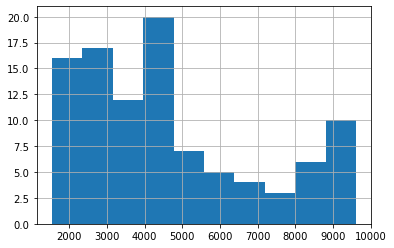

In [53]:
salary.hist()

**pandas의 cut과 qcut을 사용**
- 수치형 데이터 -> 범주형 데이터 변형

In [55]:
#cut 사용을 위해 구간을 정해줌
bins = [0, 2000, 4000, 6000, 8000, 10000]

**cut** 함수에 데이터와 구간을 입력
- 구간별로 나눠줌

In [56]:
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

- **salary[0]**은 4300값으로 '4000 ~ 6000' 사이에 포함됨을 확인

In [58]:
print('salary[0]:',salary[0])
print('salary[0]가 속한 카테고리:', ctg[0])

salary[0]: 4300
salary[0]가 속한 카테고리: (4000, 6000]


구간별로 값이 몇 개가 속해 있는지 **value_counts()**로 확인

In [60]:
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

**구간의 개수 정하기**
- **bins** 옵션에 정수를 입력
- 데이터의 최솟값에서 최댓값을 균등하게 **bins** 개수만큼 나눠줌

In [61]:
ctg = pd.cut(salary, bins=6)
ctg

0      (4230.0, 5575.0]
1      (8265.0, 9610.0]
2     (1531.93, 2885.0]
3      (2885.0, 4230.0]
4     (1531.93, 2885.0]
            ...        
95     (2885.0, 4230.0]
96     (8265.0, 9610.0]
97     (6920.0, 8265.0]
98     (2885.0, 4230.0]
99     (2885.0, 4230.0]
Length: 100, dtype: category
Categories (6, interval[float64]): [(1531.93, 2885.0] < (2885.0, 4230.0] < (4230.0, 5575.0] < (5575.0, 6920.0] < (6920.0, 8265.0] < (8265.0, 9610.0]]

In [62]:
ctg.value_counts().sort_index()

(1531.93, 2885.0]    27
(2885.0, 4230.0]     24
(4230.0, 5575.0]     21
(5575.0, 6920.0]      6
(6920.0, 8265.0]      7
(8265.0, 9610.0]     15
dtype: int64

**qcut**은 구간을 일정하게 나누는 것이 아님
- 데이터의 분포를 비슷한 크기의 그룹으로 나눔

In [63]:
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [64]:
print(ctg.value_counts().sort_index())

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64


---

### 마무리와 복습 과제   
**정리**   
   - 결측치(Missing Data)
   - 중복된 데이터
   - 이상치(Outlier)
   - 정규화(Normalization)
   - 원-핫 인코딩(One-Hot Encoding)
   - 구간화(Binning)
    
**데이터 전처리는 데이터의 특성을 파악해서 진행**

**복습**   
Kaggle 'Vidio Game Sales' datasets   
https://www.kaggle.com/gregorut/videogamesales
- 16,500개 이상의 비디오 게임의 대한 매출 정보
